# Simple Linear Regression

### In this linear regression task, based on the number of hours studied the model would predict the percentage of marks which a student is expected to score. As this task involves only 2 variables so it can be said as a simple linear regression task

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading data from URL
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
stu_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


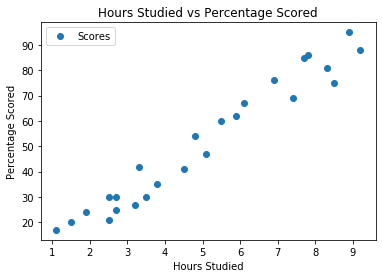

In [3]:
#Plotting hours studied vs percentage score graph
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

### Thus an almost linear relationship can be observed between hours studied and percentage scored.

**_Preparing Data_**

In [4]:
X = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

**_Training the Model_**

In [5]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**_Plotting Regression Line_**

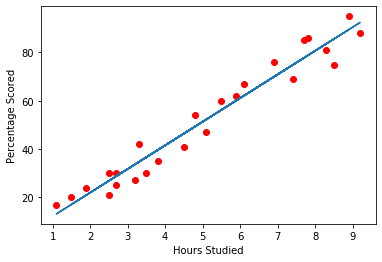

In [6]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.plot(X, line);
plt.show()

**_Predictions_**

In [7]:
#Testing data
print(X_test) 
#Prediction of scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [8]:
#Comparison between actual and predicted data
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [9]:
print("Training Score ",regressor.score(X_train,y_train))
print("Testing Score ",regressor.score(X_test,y_test))

Training Score  0.9484997422695115
Testing Score  0.9568211104435257


**_Plotting of Bar Chart for Actual and Predicted value_**

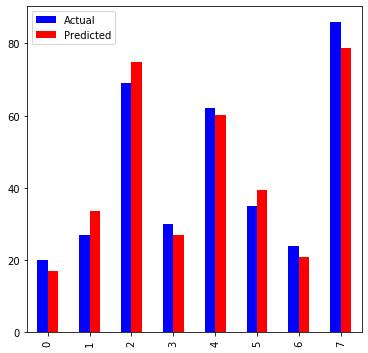

In [10]:
comp.plot(kind='bar',figsize=(6,6),color=('blue','red'))
plt.show()

In [11]:
# Percentage scored when studied for 9.25 hours
hours = np.array(9.25)
print("No. of hours studied = {}".format(hours))
hours = hours.reshape(-1,1)
score_pred = regressor.predict(hours)
print("Predicted Score = {}".format(score_pred[0]))

No. of hours studied = 9.25
Predicted Score = 92.91505723477056


## Model Evalution

In [13]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
Explained Variance Score: 0.9568649952899161


### Conclusion

**__Thus, according to our model the predicted percentage scored are 92.91% for 9.25 hrs/day.__**

**__The accuracy of our model is 94.84%__**